# End to End Machine Learning With Deployment

### Part1- EDA of the Medical Dataset
1. Import the libraries
2. Load and View the data
3. Clean the data
4. Complete EDA of the data ( depoloy a EDA page in streamlit) 

### Part2-Modelling of the data set
5. Preprocessing for modelling
6. Fit and Evaluate various models
7. OPtimize the chosen model
8. Interpret the model
9. Create a pipeline for the model
10. Pickle the model 
11. Deploy the model in streamlit 

### Step1. Import the libraries

In [3]:
!pip install imblearn
!pip install xgboost


In [4]:
!pip install streamlit

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
print("All needed libraries are imported")

#libraries for preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from imblearn.over_sampling import SMOTE

#libraries for modelling
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

## Model evaluation
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,classification_report
from sklearn.metrics import plot_confusion_matrix,plot_precision_recall_curve, plot_roc_curve

## import library for deployment
import streamlit as st

All needed libraries are imported


### Step2. Load and View the data

In [6]:
data=pd.read_csv('data.csv')
data.head(10)

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148,72,35,0,33.6,0.627,50,Yes
1,1,1,85,66,29,0,26.6,0.351,31,No
2,2,8,183,64,0,0,23.3,0.672,32,Yes
3,3,1,89,66,23,94,28.1,0.167,21,No
4,4,0,137,40,35,168,43.1,2.288,33,Yes
5,5,5,116,74,0,0,25.6,0.201,30,No
6,6,3,78,50,32,88,31.0,0.248,26,Yes
7,7,10,115,0,0,0,35.3,0.134,29,No
8,8,2,197,70,45,543,30.5,0.158,53,Yes
9,9,8,125,96,0,0,0.0,0.232,54,Yes


In [7]:
data.shape

(768, 10)

In [8]:
data.dtypes

Unnamed: 0                    int64
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                      object
dtype: object

In [9]:
data.isnull().sum()

Unnamed: 0                  0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
data.duplicated().sum()

0

In [11]:
data[~data.applymap(np.isreal).any(1)]

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [12]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,768.0,383.500000,221.846794,0.000,191.75000,383.5000,575.25000,767.00
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00


In [13]:
data.columns

Index(['Unnamed: 0', 'Pregnancies', 'Glucose', 'BloodPressure',
       'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age',
       'Outcome'],
      dtype='object')

**Observations**
1. Data has 768 rows and 10 columns 
2. The first column is 'Unnamed: 0' which is redundant
3. All columns are numerical except the Outcome 
4. There are no nulls in the data 
5. However there are nulls present as 0's
6. There are no duplicates or corrupt characters


### Step 3. Clean the data

In [14]:
# remove the redundant columns
data.drop('Unnamed: 0', axis=1, inplace=True)

In [15]:
data.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,Yes
1,1,85,66,29,0,26.6,0.351,31,No


In [16]:
zerofill=lambda x:x.replace(0, x.median())
cols=data.columns[1:6]
data[cols]=data[cols].apply(zerofill, axis=0)

In [17]:
data.describe().T


,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,121.656250,30.438286,44.000,99.75000,117.0000,140.25000,199.00
BloodPressure,768.0,72.386719,12.096642,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,768.0,27.334635,9.229014,7.000,23.00000,23.0000,32.00000,99.00
Insulin,768.0,94.652344,105.547598,14.000,30.50000,31.2500,127.25000,846.00
BMI,768.0,32.450911,6.875366,18.200,27.50000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00


In [18]:
d={'Yes':1, 'No':0}
df=data.copy()
df['Outcome']=df['Outcome'].map(d)

In [19]:
df.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0


### Step4. Complete EDA of the data ( depoloy a EDA page in streamlit) 

**Univariate Analysis**
1. Numericals -histograms and boxplots 
2. Categorical- barcharts 

**Bivariate Analysis**
1. Categorical vs Numerical barchart
2. Scatter plots and Line plots 
3. Pairplots 

**Corralations**
1. Correlation Matrix
2. Heatmap

**Univariate Analysis**

In [20]:
def histograms(data):
    print('Histograms')
    data.hist()
    plt.tight_layout()
    plt.show()

Histograms


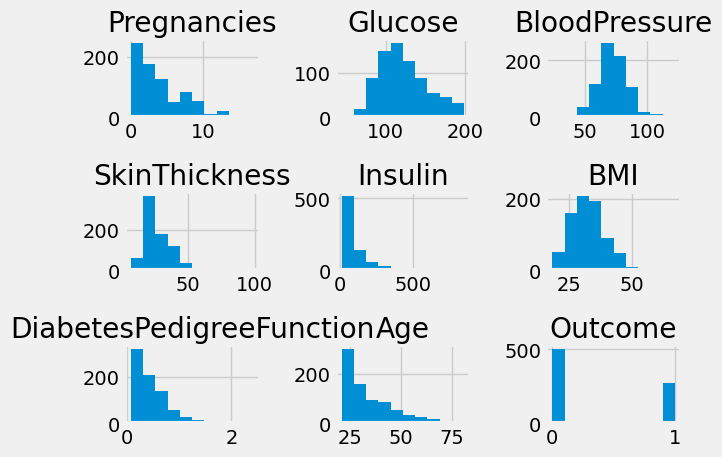

In [21]:

histograms(df)

In [22]:
def boxplot_histplot(data, feature, bins=None, figsize=(12,7)):
    print("Boxplot and Histplot for ", feature)
    fig, (ax_box, ax_hist)=plt.subplots(
    nrows=2,
    sharex=True,
    gridspec_kw={'height_ratios':(0.25, 0.75)},
    figsize=figsize)
    
    sns.boxplot(data=data, x=feature, showmeans=True, color='orange', ax=ax_box)
    sns.histplot(data=data, x=feature, bins=bins, ax=ax_hist, pallete='green') if bins else sns.\
                         histplot(data=data, x=feature, ax=ax_hist)
    ax_hist.axvline(data[feature].mean(), color='green', linestyle='--')
    ax_hist.axvline(data[feature].median(), color='black', linestyle='-')
    plt.show()

Boxplot and Histplot for  Pregnancies


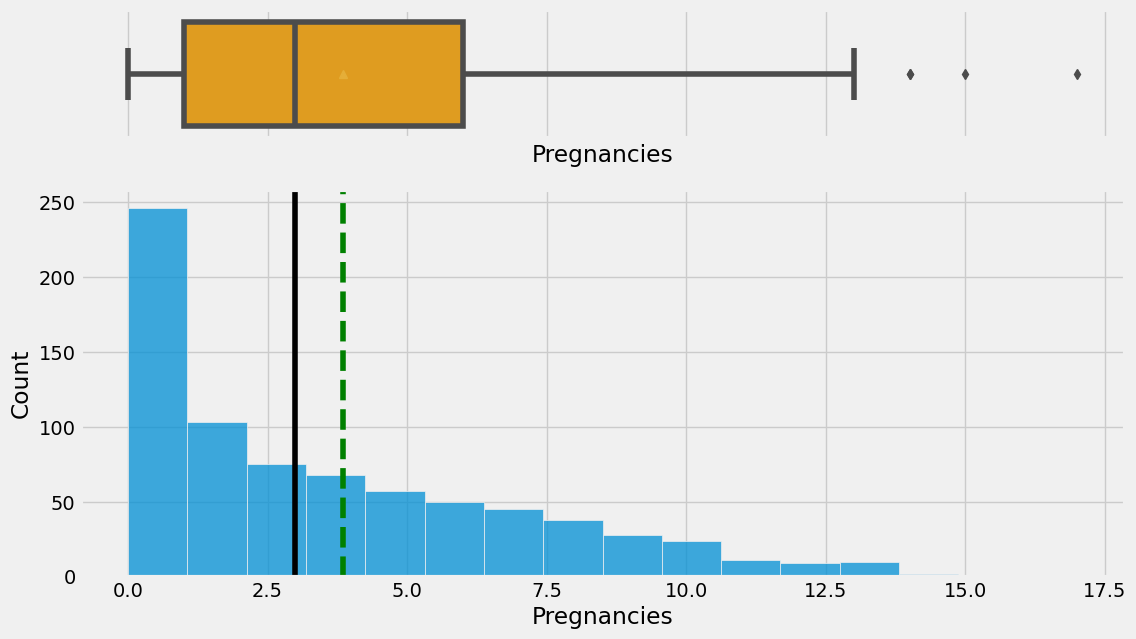

Boxplot and Histplot for  Glucose


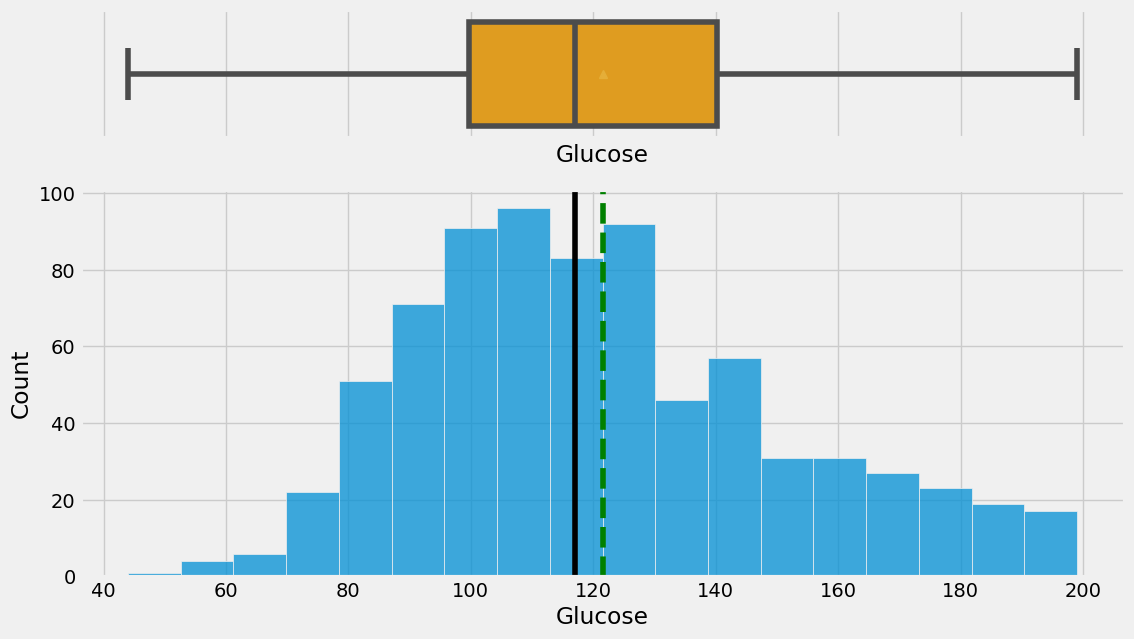

Boxplot and Histplot for  BloodPressure


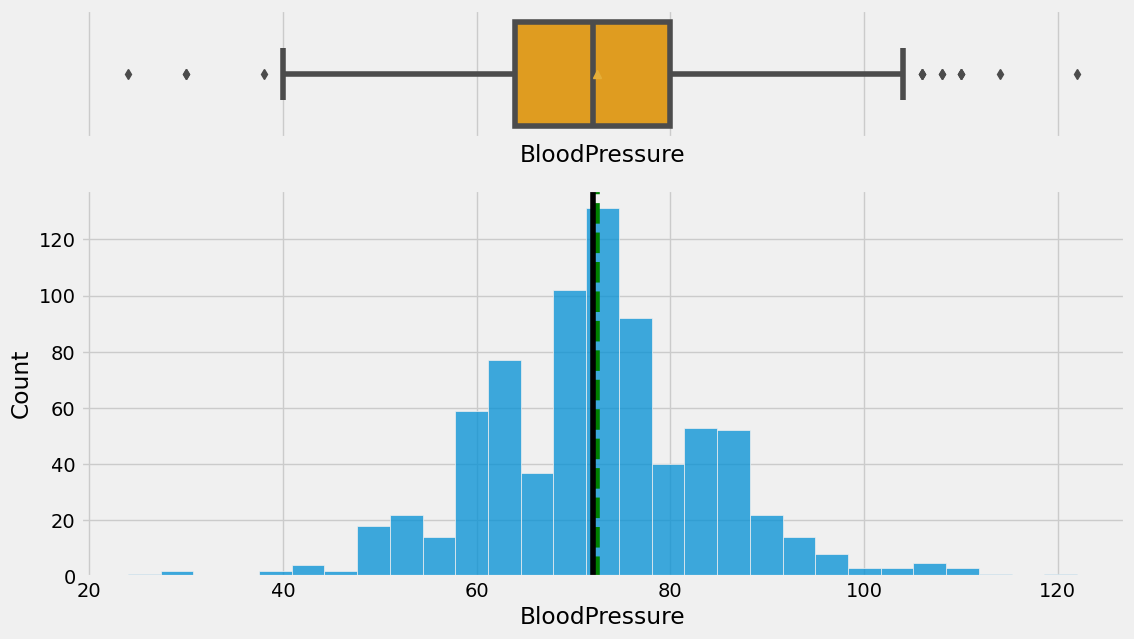

Boxplot and Histplot for  SkinThickness


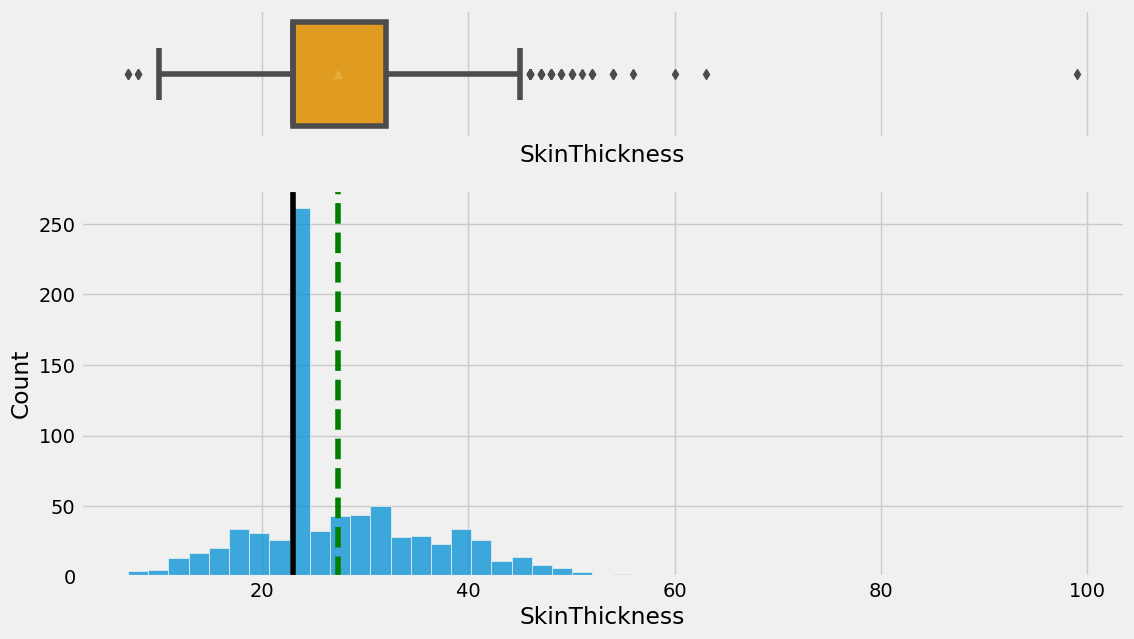

Boxplot and Histplot for  Insulin


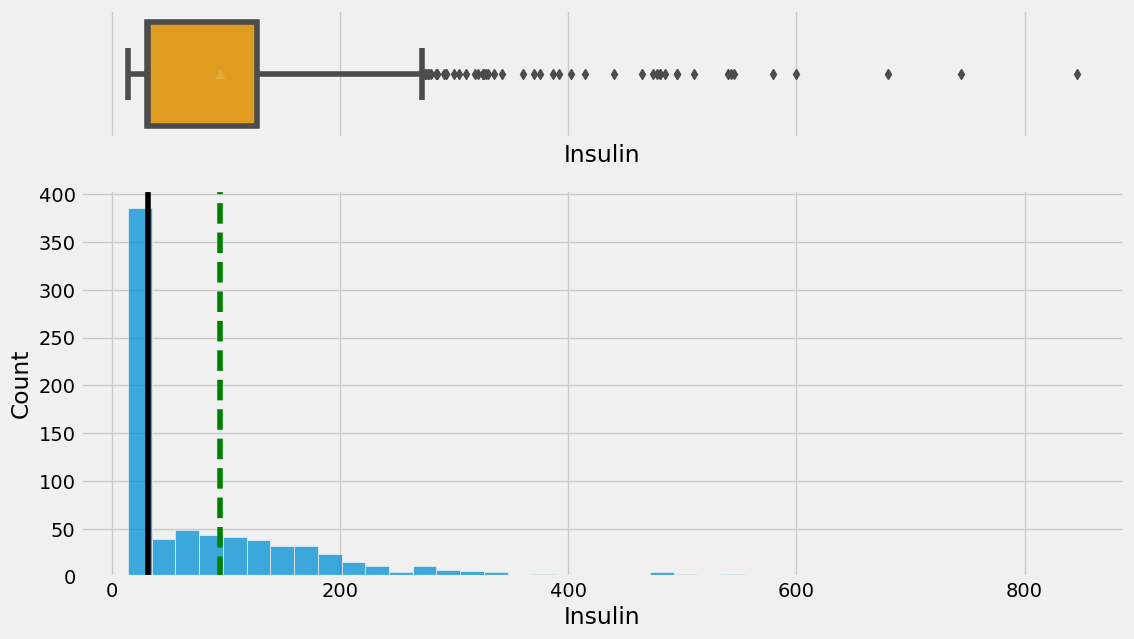

Boxplot and Histplot for  BMI


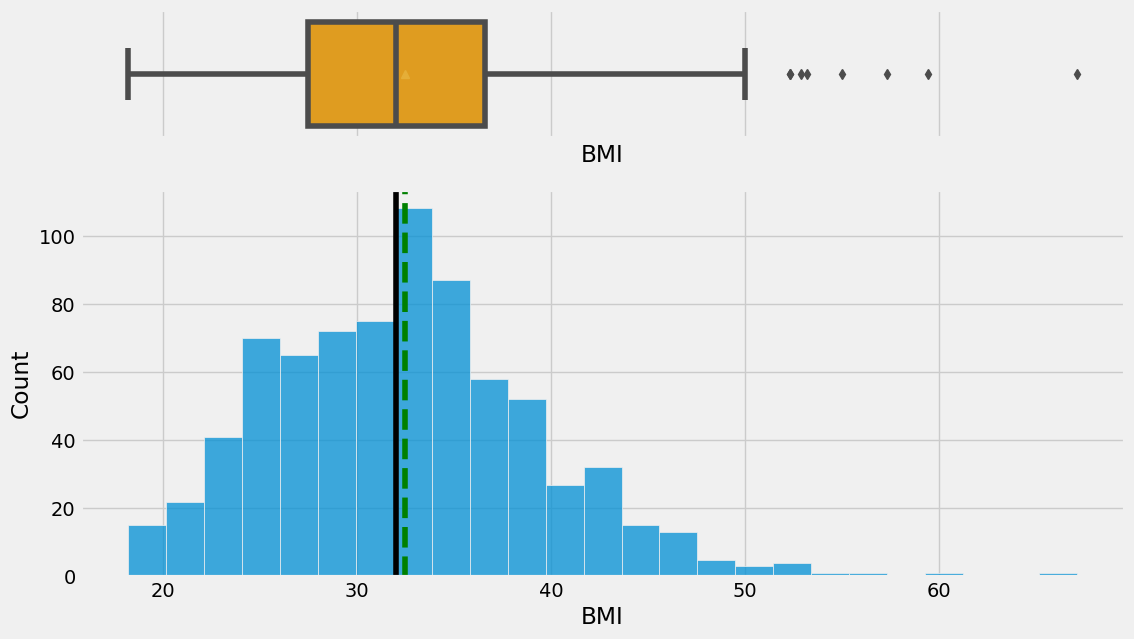

Boxplot and Histplot for  DiabetesPedigreeFunction


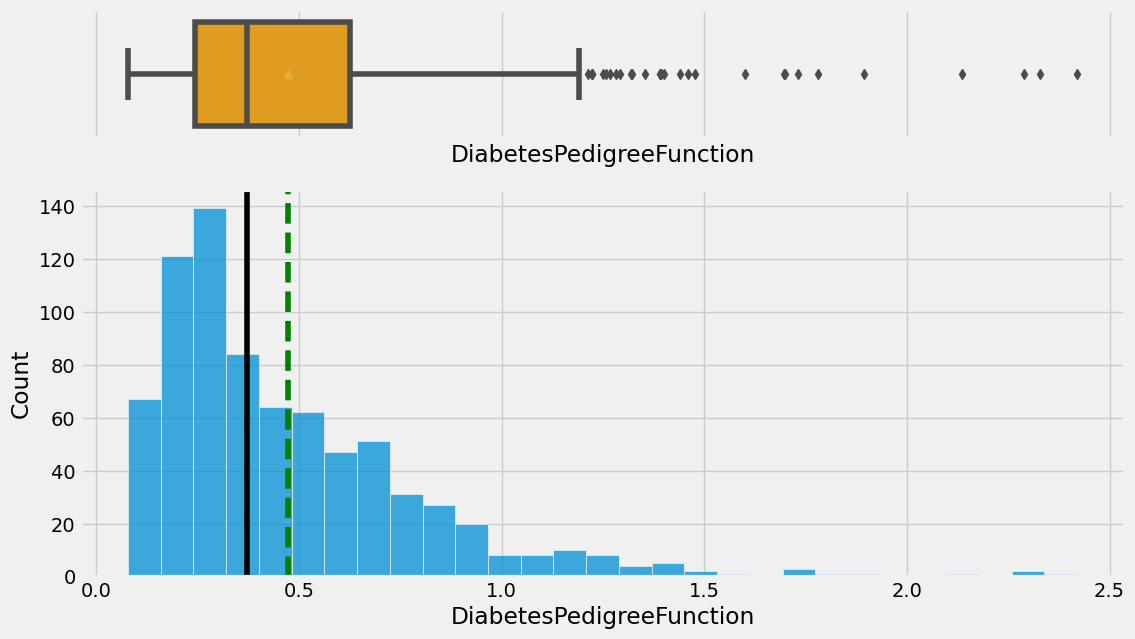

Boxplot and Histplot for  Age


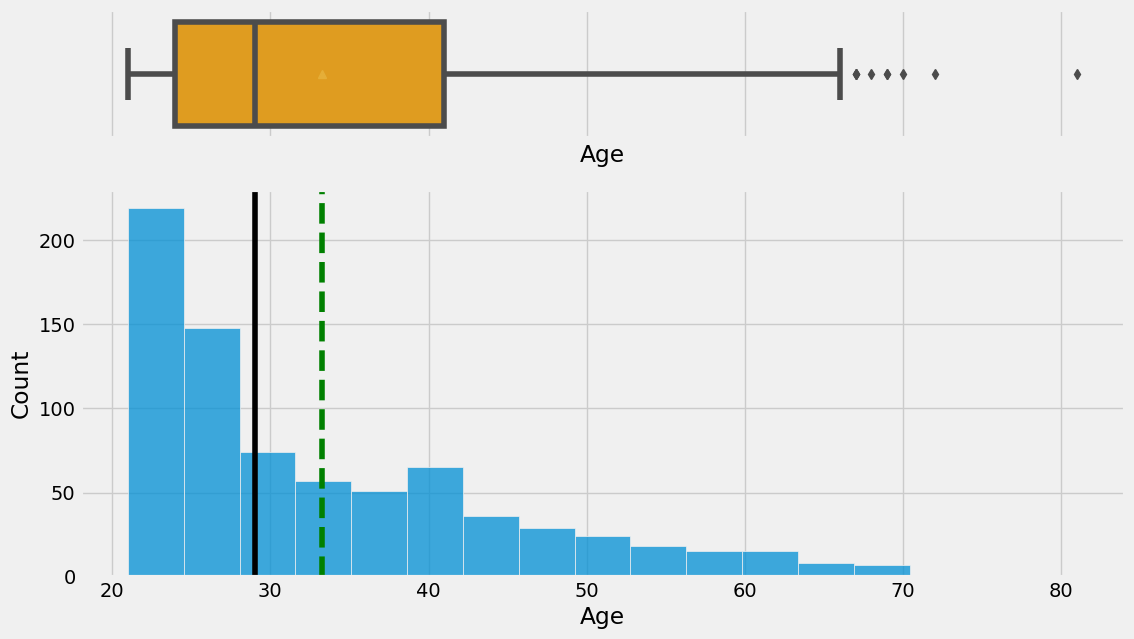

In [23]:
for col in data.select_dtypes(exclude='O').columns:
    boxplot_histplot(data=data, feature=col, bins=None, figsize=(12,7))

In [24]:
def barchart(data, feature):
    print("Univariate Countplot of ", feature)
    plt.figure(figsize=(12,7))
    ax=sns.countplot(data=data, x=feature, color='green')
    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate("{:.3g}%".format(100.*y/len(df)), (x.mean(), y), ha='center', va='bottom')
    plt.show()

Univariate Countplot of  Outcome


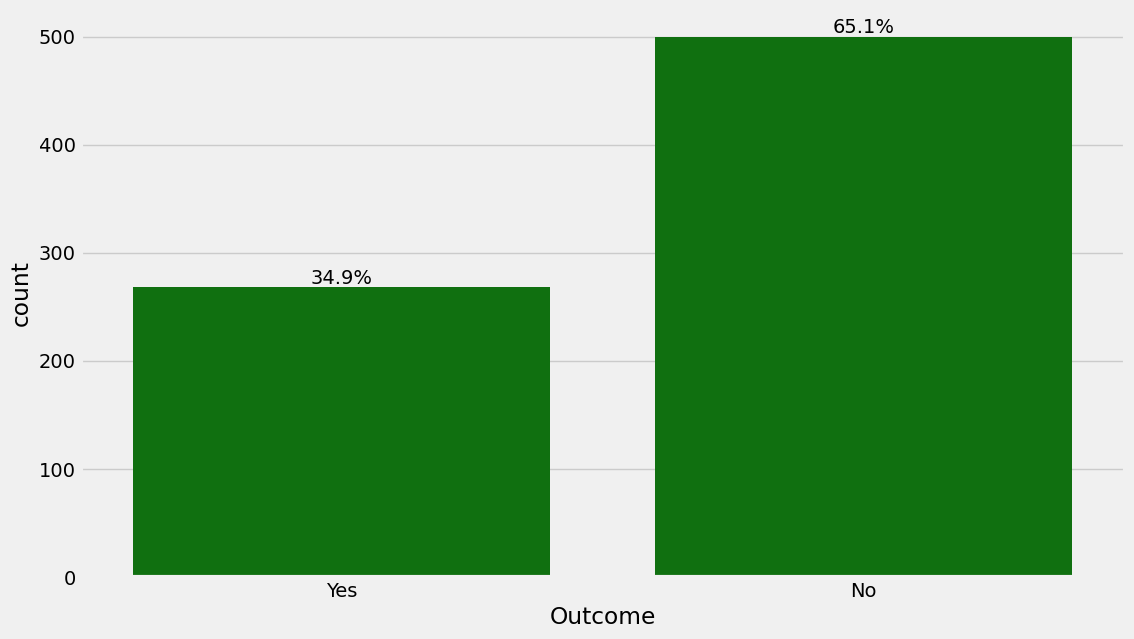

In [25]:
barchart(data=data, feature='Outcome')

**Observations**
1. Insulin . DPF and Age are highly right skewed and having heavy amoiunt of outliers ( we may need to do data transformation like log) 
2. Age and Pregnancies are also right skewed with some extreme values which may be legit ( need to consukt with domain experts)
3. Outcome variable is highly imbalanced(Yes:No = 1:2) , we need to solve for data imbalance before modelling
4. Missing values have been taken care of
5. Label Encoding is done 

**Bivariate Analysis**
1. Categorical vs Numerical barchart
2. Scatter plots and Line plots 
3. Pairplots 

In [26]:
def catnum(data, feature1, feature2):
    print("Bivariate Barchart between {0} and {1}".format(feature1, feature2))
    data.groupby(feature1)[feature2].mean().plot(kind='bar', color='orange')
    plt.ylabel(col)
    plt.show()
    

Bivariate Barchart between Outcome and Pregnancies


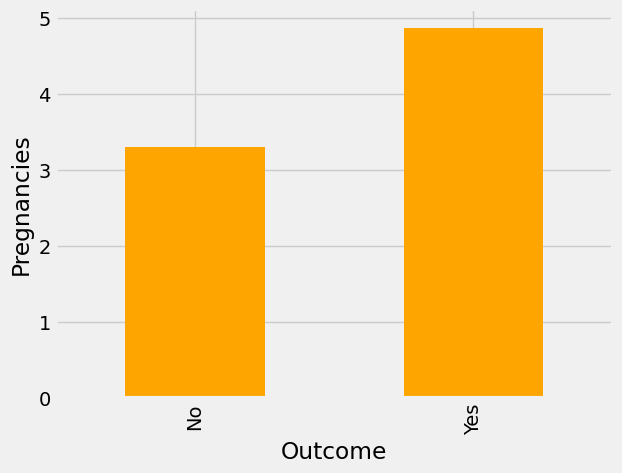

Bivariate Barchart between Outcome and Glucose


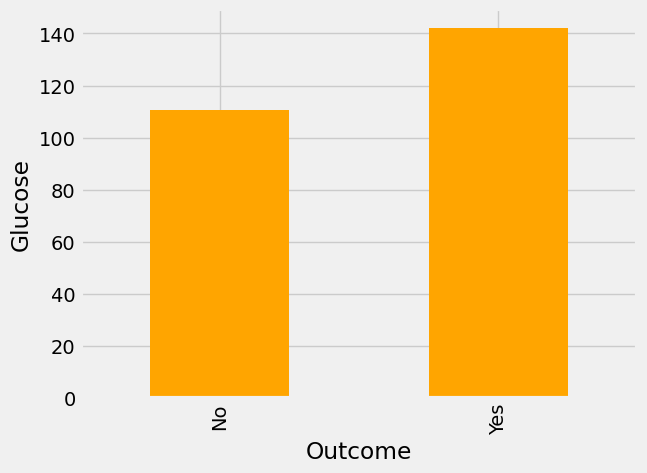

Bivariate Barchart between Outcome and BloodPressure


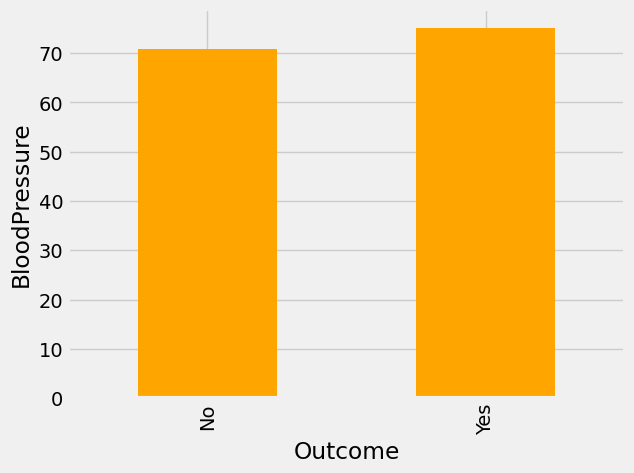

Bivariate Barchart between Outcome and SkinThickness


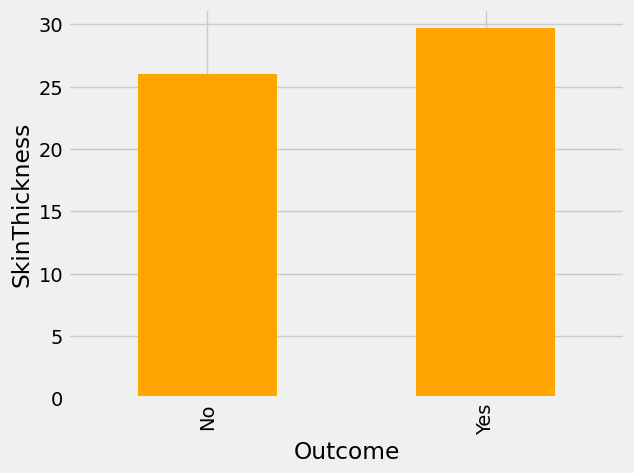

Bivariate Barchart between Outcome and Insulin


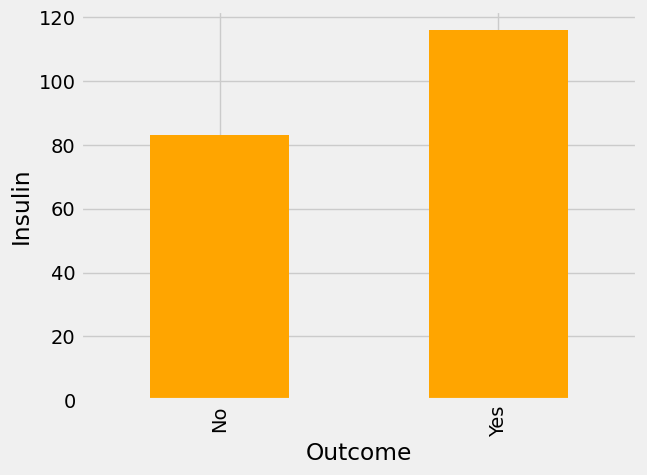

Bivariate Barchart between Outcome and BMI


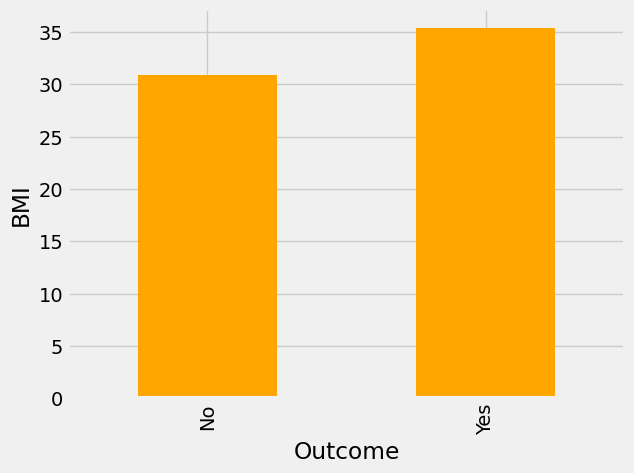

Bivariate Barchart between Outcome and DiabetesPedigreeFunction


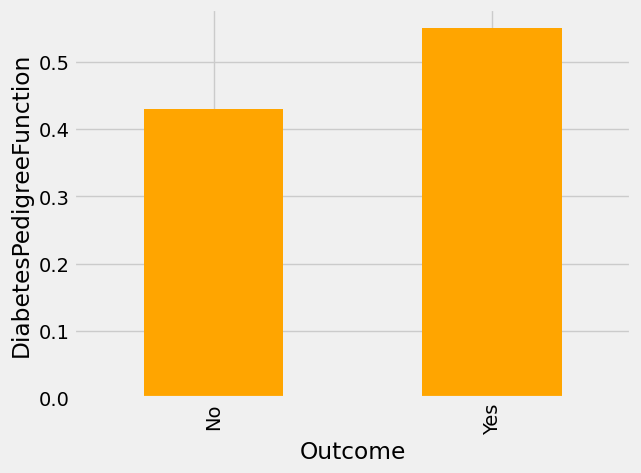

Bivariate Barchart between Outcome and Age


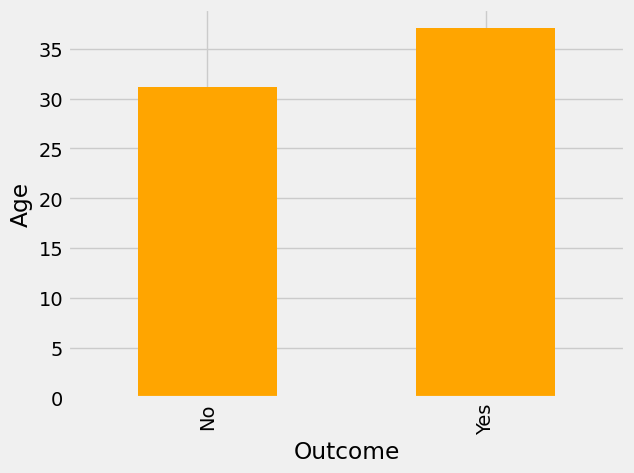

In [27]:
for col in data.select_dtypes(exclude='O').columns:
    catnum(data=data, feature1='Outcome', feature2=col)

In [28]:
def lineplot_scatterplot(data, feature1, feature2):
    plt.figure(figsize=(16,7))
    print("Bivariate Charts for {0} and {1}".format(feature1, feature2))
    plt.subplot(1,2,1)
    sns.lineplot(data=data, x=feature1, y=feature2, color='green')
    plt.title('Lineplot between features')
    
    plt.subplot(1,2,2)
    sns.scatterplot(data=data, x=feature1, y=feature2, color='orange')
    plt.title('Scatterplot between features')
    plt.show()
    

Bivariate Charts for Glucose and Pregnancies


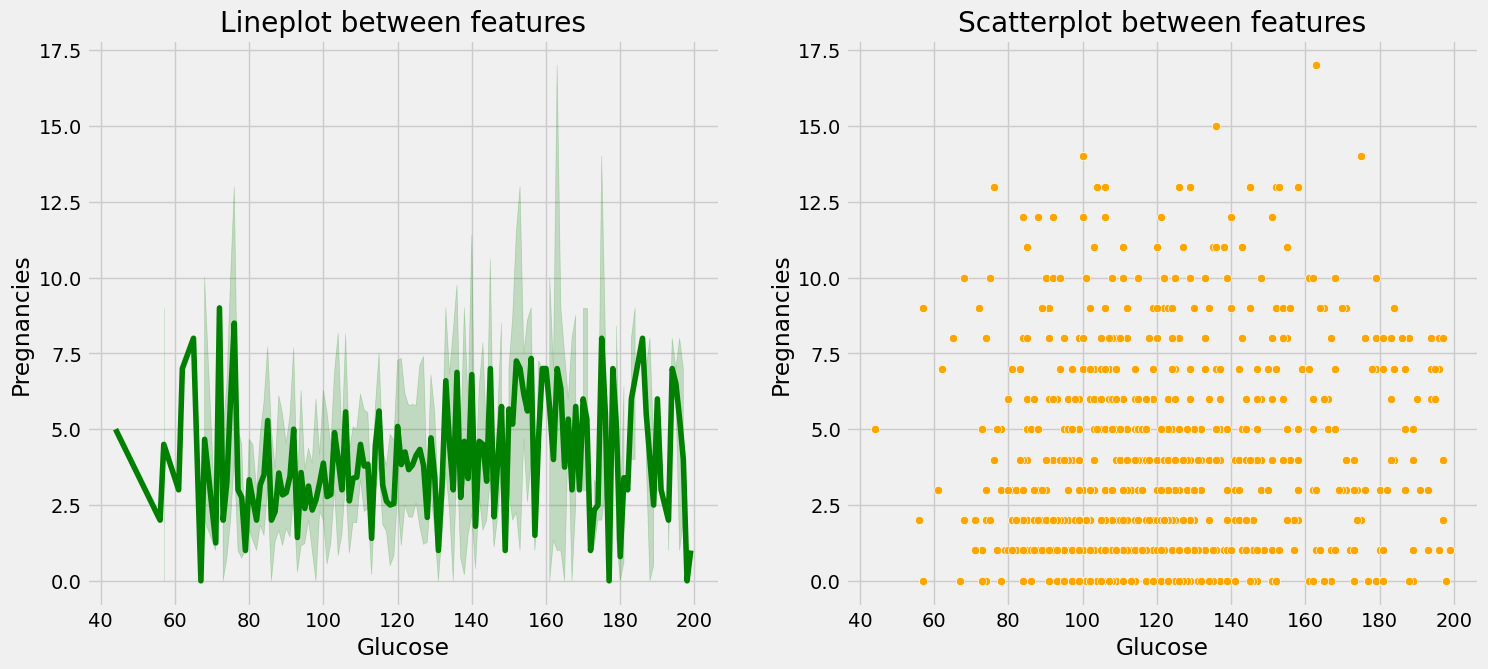

Bivariate Charts for Glucose and Glucose


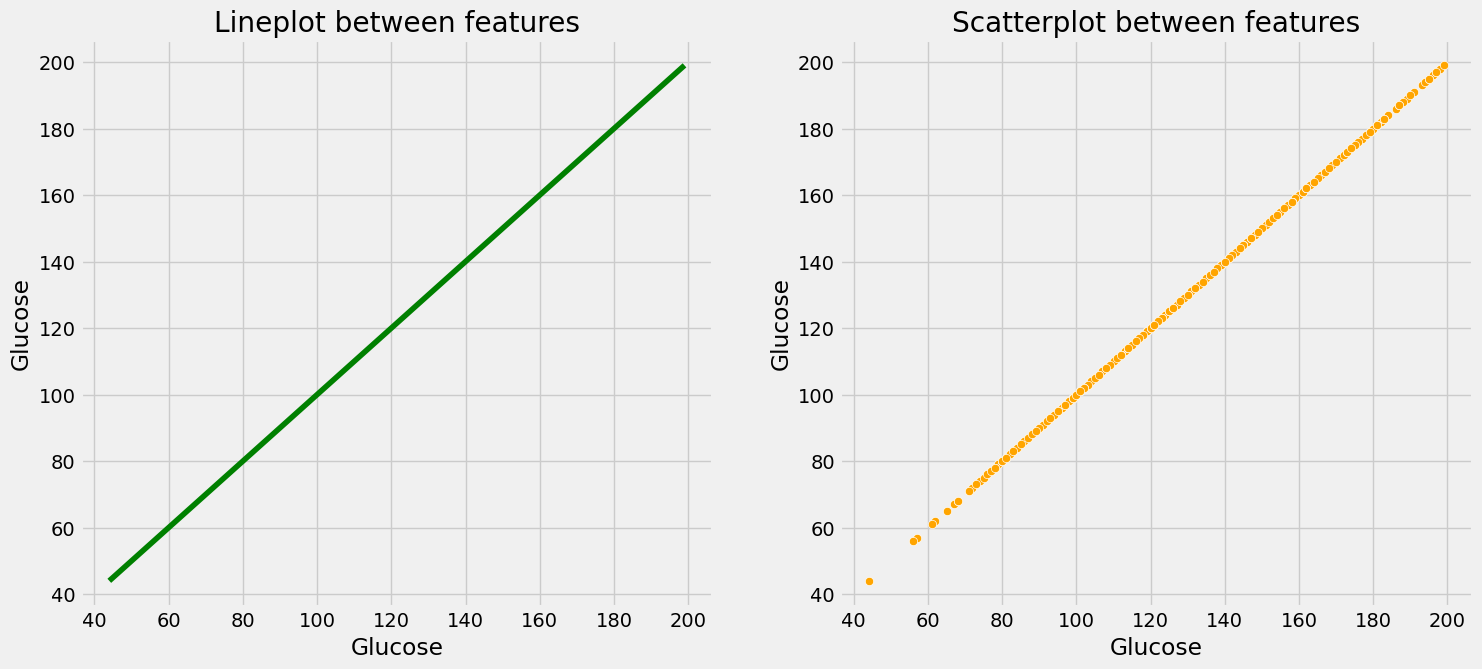

Bivariate Charts for Glucose and BloodPressure


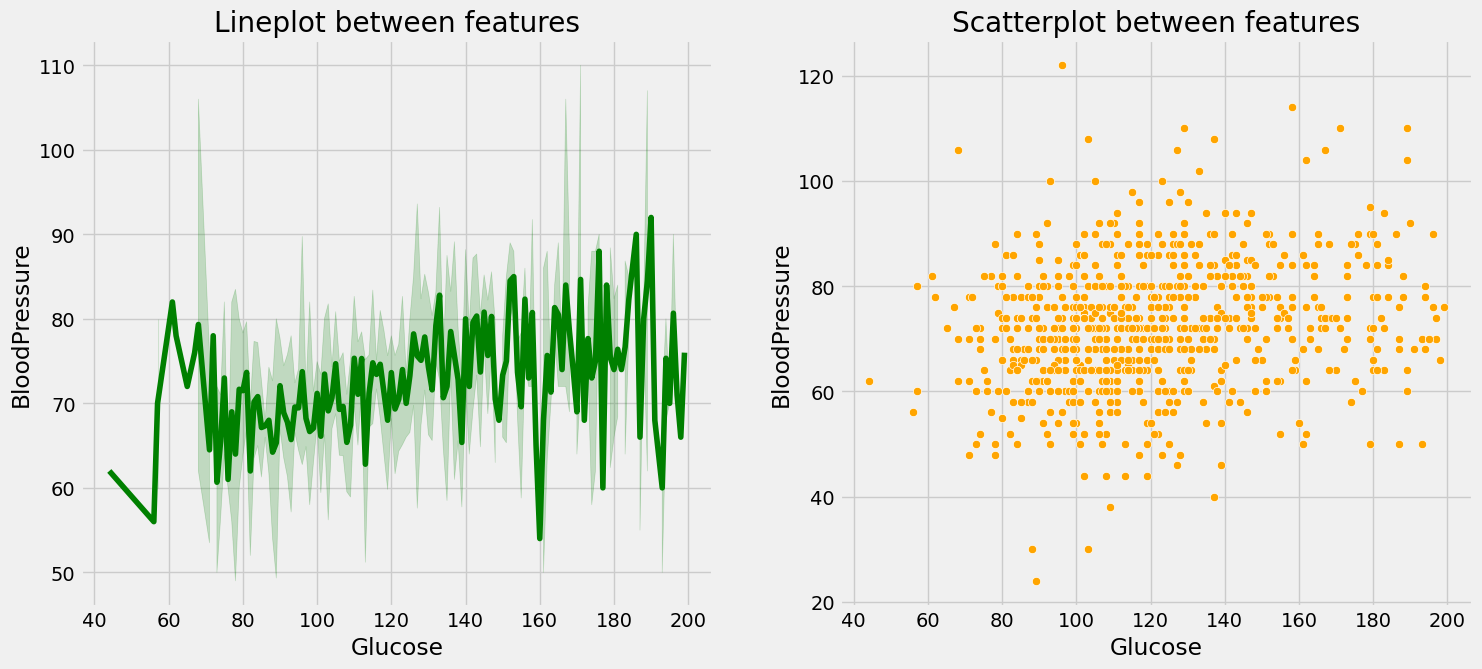

Bivariate Charts for Glucose and SkinThickness


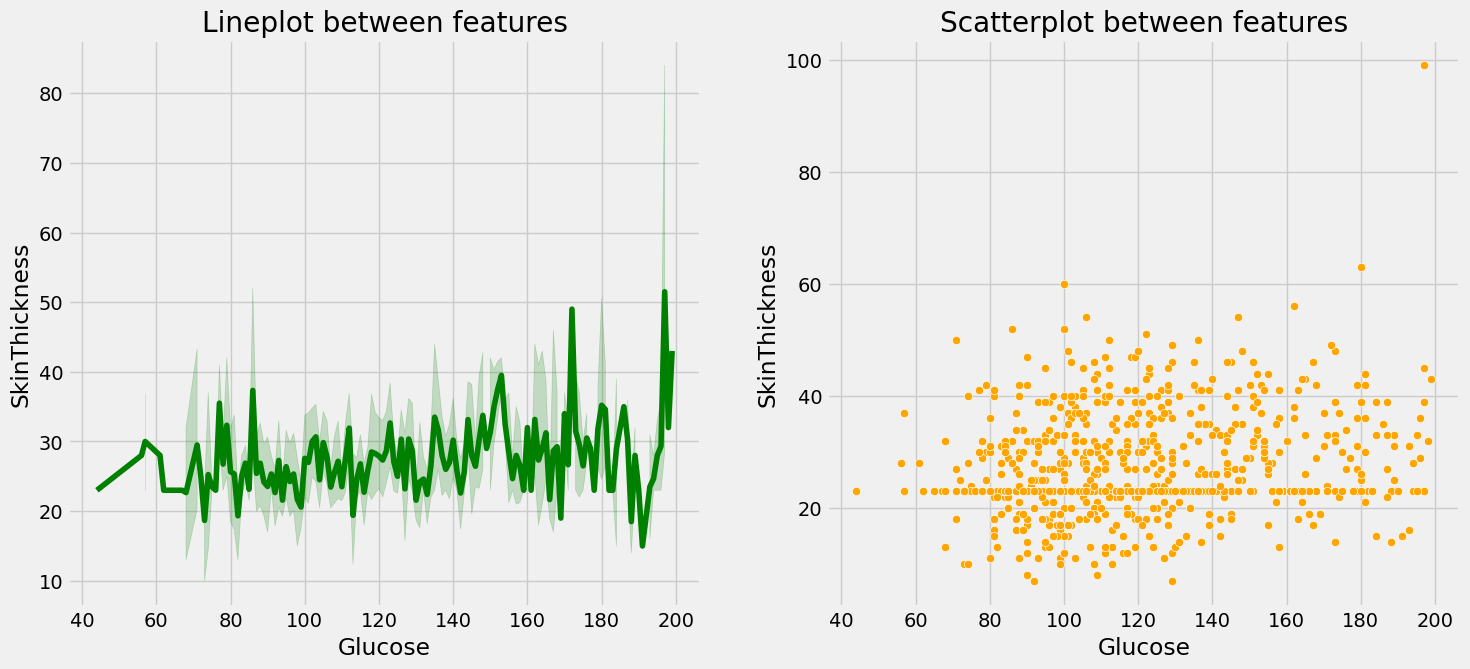

Bivariate Charts for Glucose and Insulin


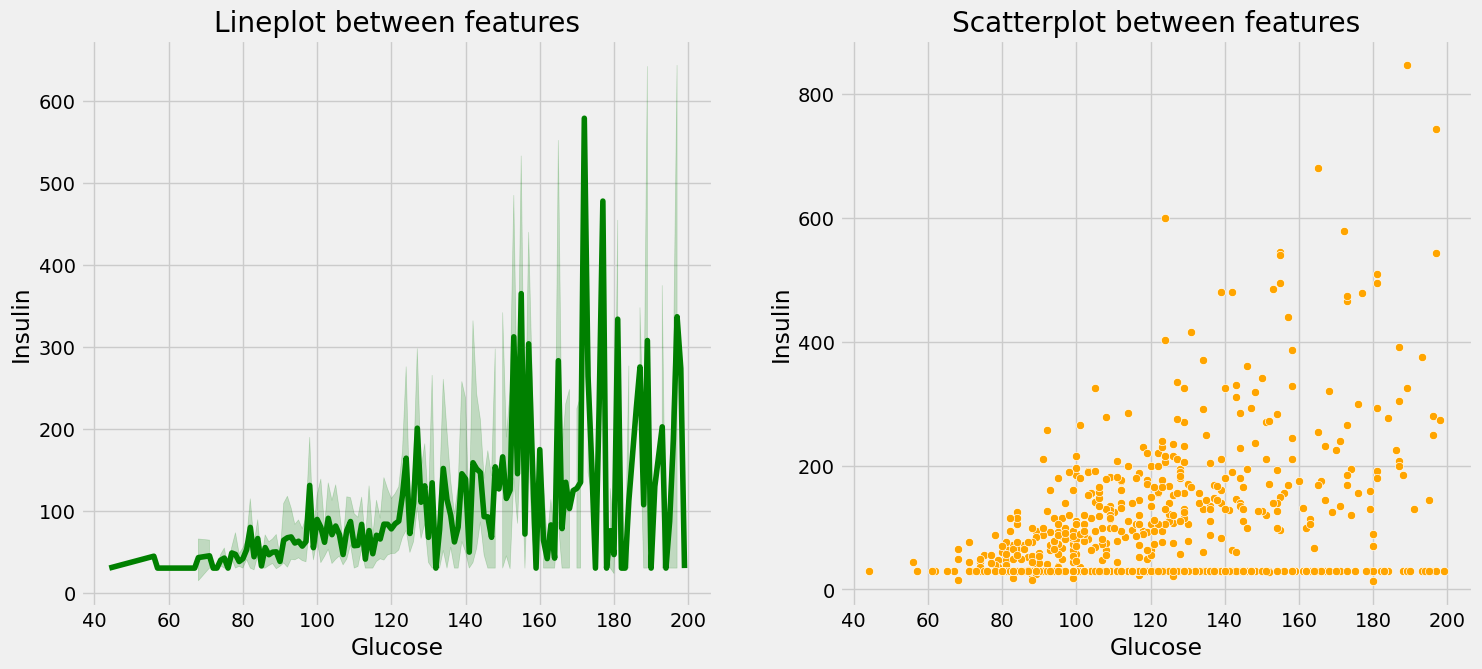

Bivariate Charts for Glucose and BMI


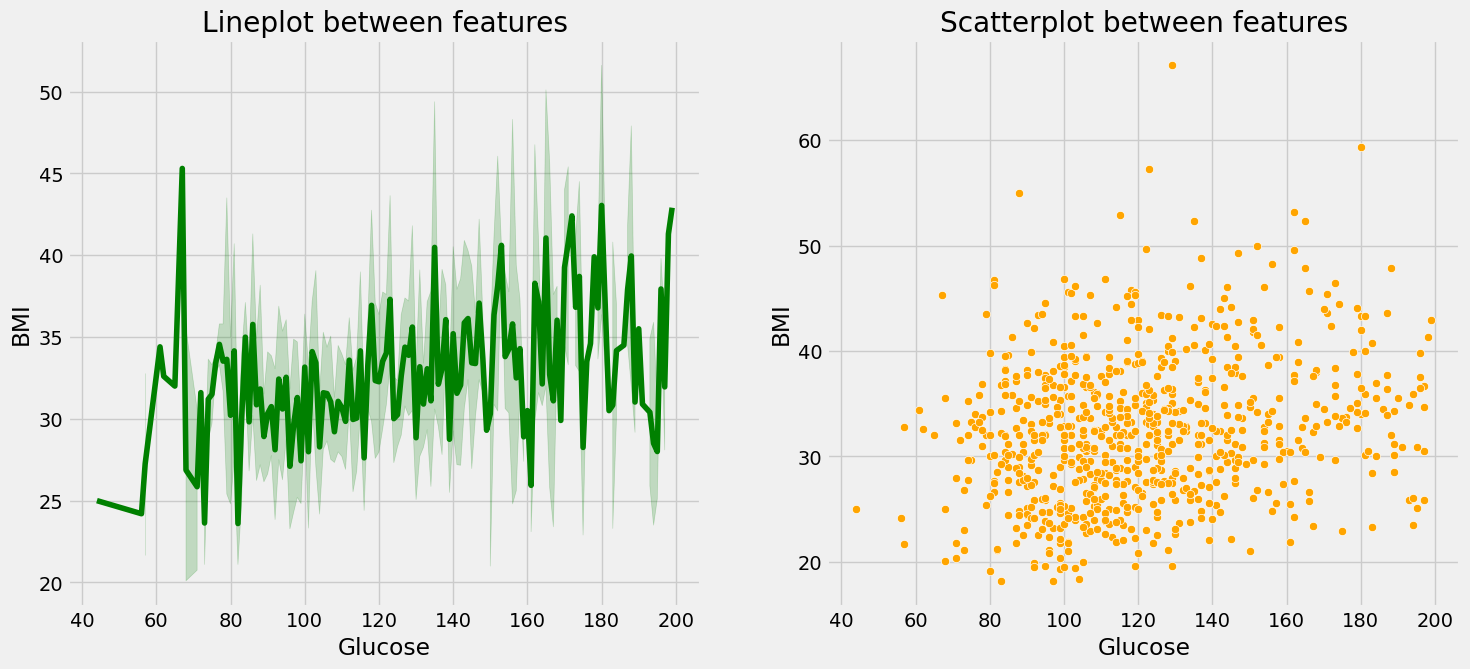

Bivariate Charts for Glucose and DiabetesPedigreeFunction


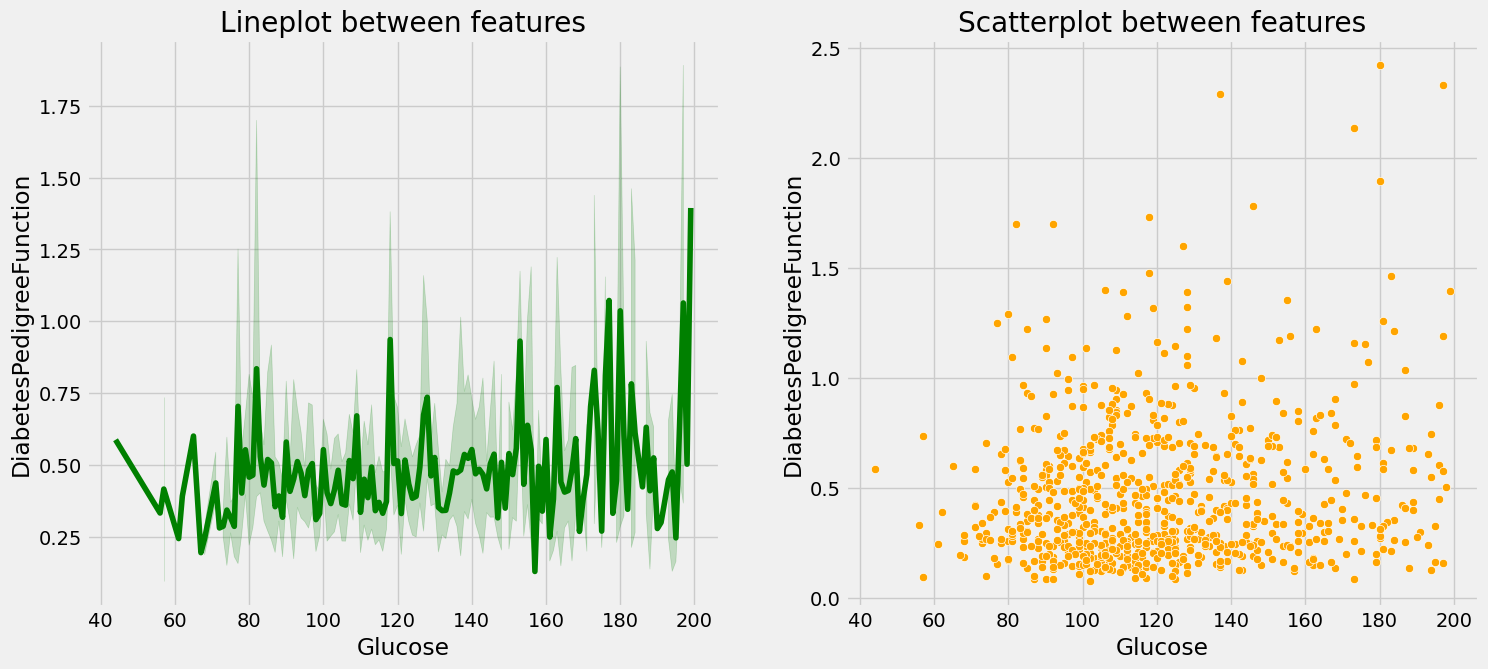

Bivariate Charts for Glucose and Age


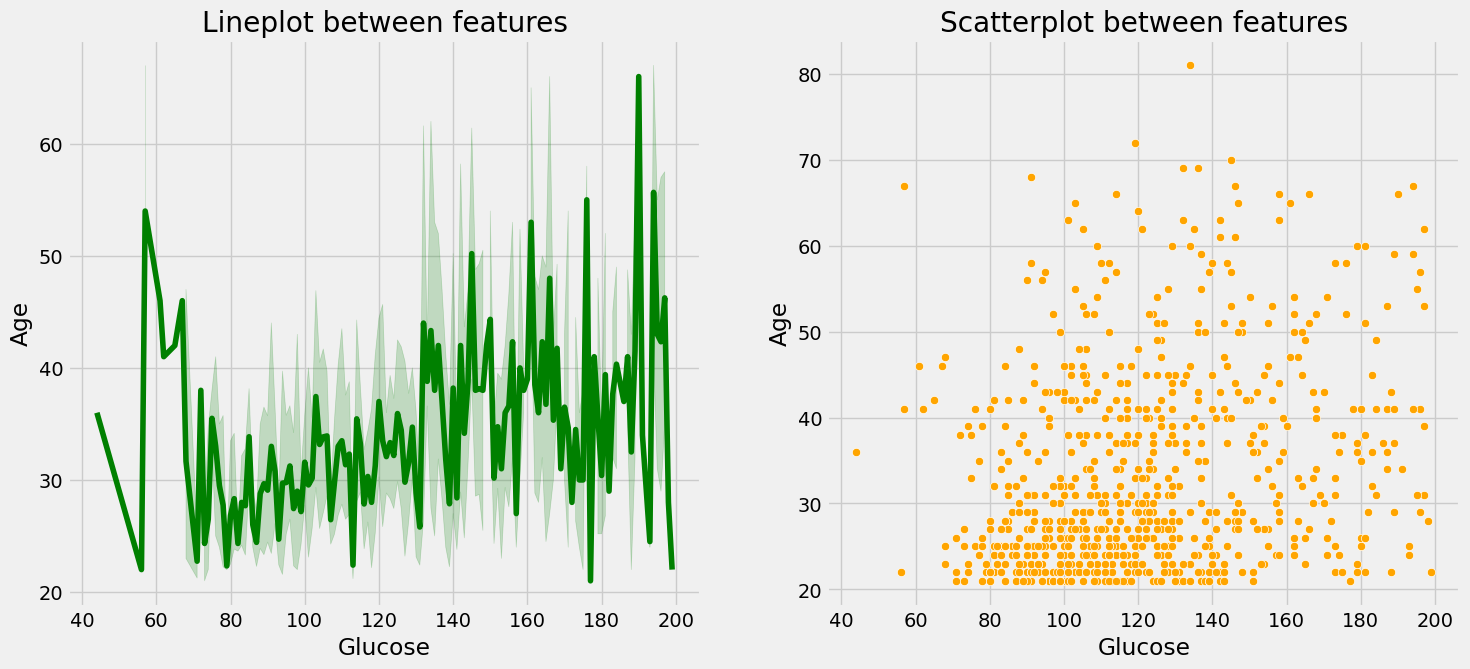

Bivariate Charts for Glucose and Outcome


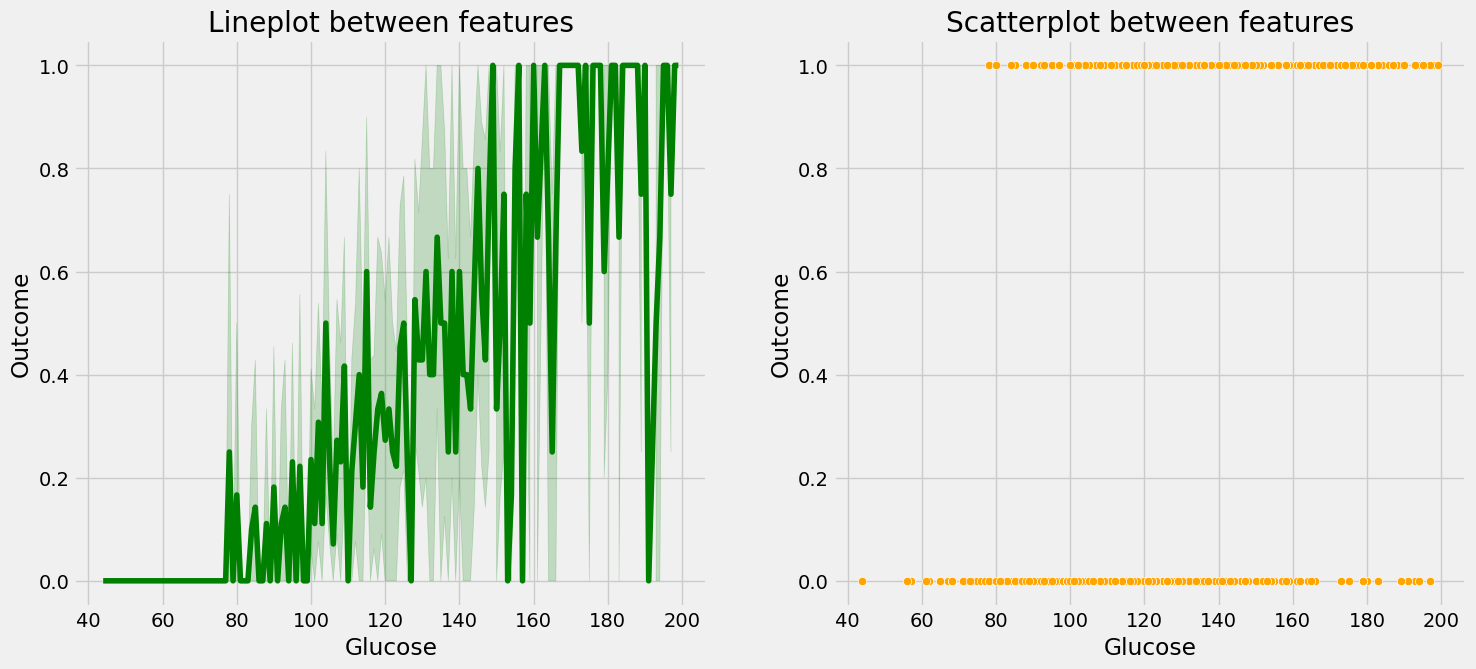

In [29]:
for col in df.select_dtypes(exclude='O').columns:
    lineplot_scatterplot(data=df, feature1='Glucose', feature2=col)

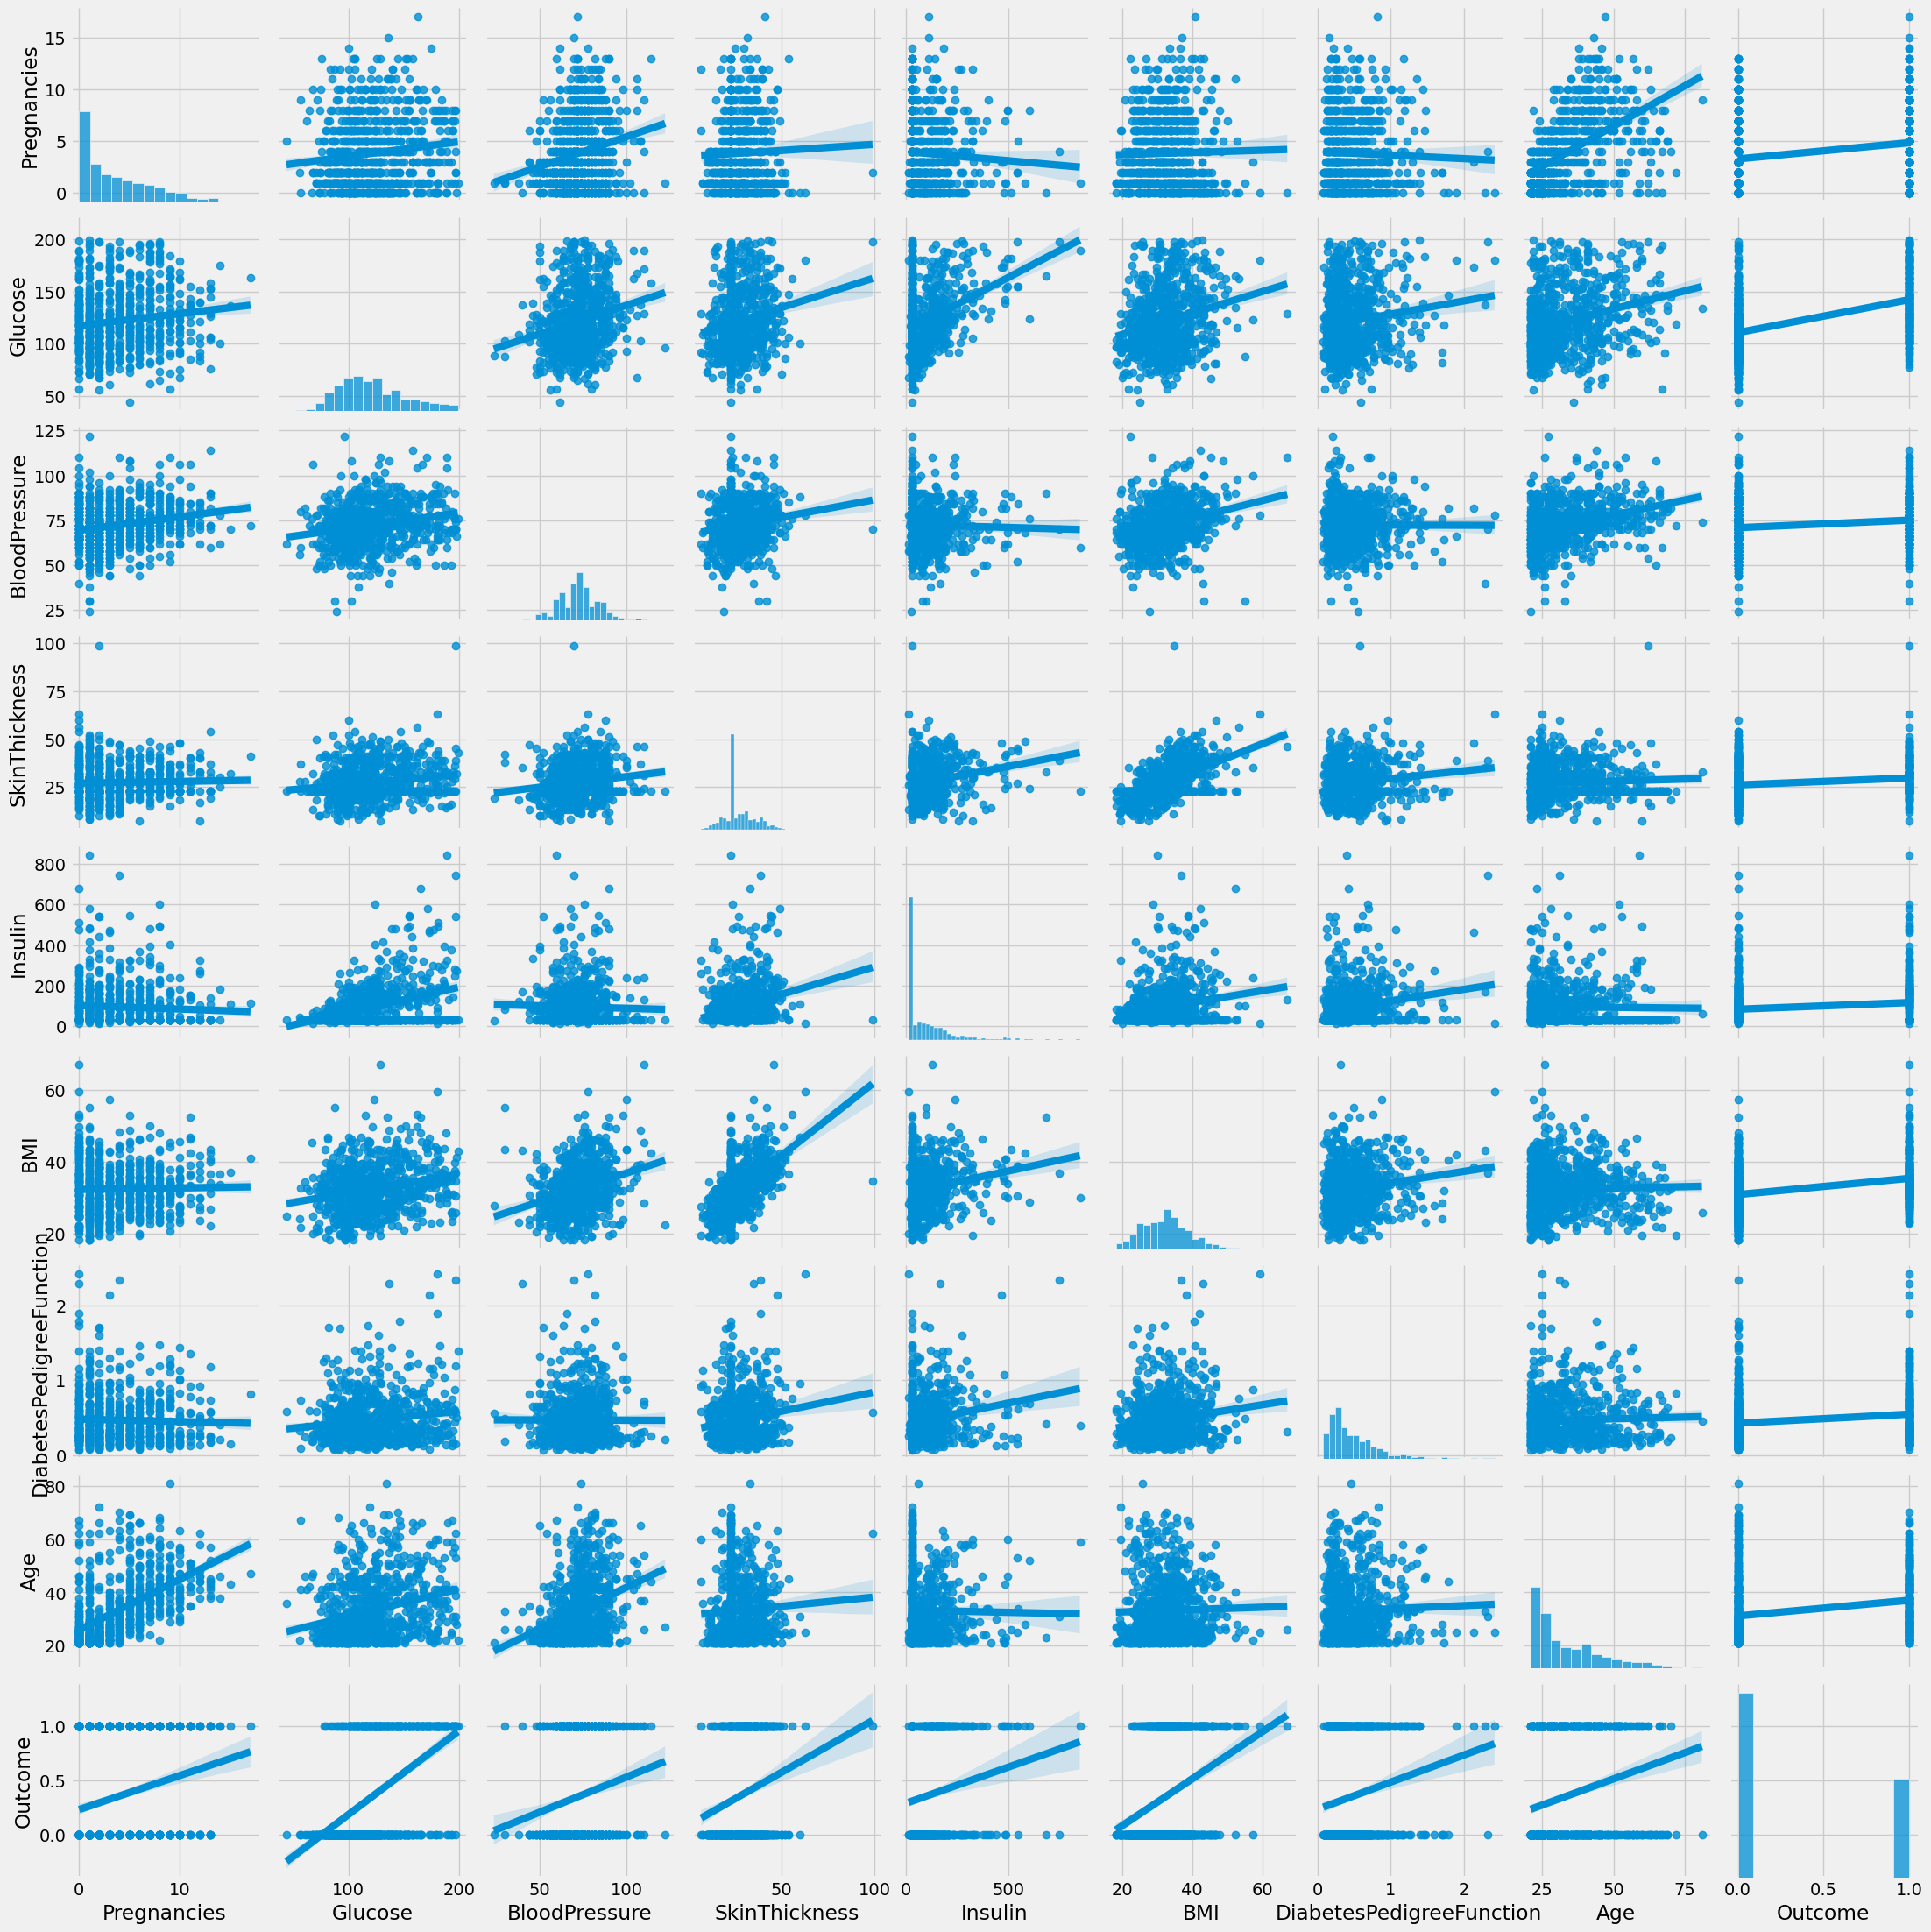

In [30]:
sns.pairplot(df, kind='reg')

**Corralations**
1. Correlation Matrix
2. Heatmap

In [31]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128213,0.208615,0.032568,-0.055697,0.021546,-0.033523,0.544341,0.221898
Glucose,0.128213,1.000000,0.218937,0.172143,0.357573,0.231400,0.137327,0.266909,0.492782
BloodPressure,0.208615,0.218937,1.000000,0.147809,-0.028721,0.281132,-0.002378,0.324915,0.165723
SkinThickness,0.032568,0.172143,0.147809,1.000000,0.238188,0.546951,0.142977,0.054514,0.189065
Insulin,-0.055697,0.357573,-0.028721,0.238188,1.000000,0.189022,0.178029,-0.015413,0.148457
BMI,0.021546,0.231400,0.281132,0.546951,0.189022,1.000000,0.153506,0.025744,0.312249
DiabetesPedigreeFunction,-0.033523,0.137327,-0.002378,0.142977,0.178029,0.153506,1.000000,0.033561,0.173844
Age,0.544341,0.266909,0.324915,0.054514,-0.015413,0.025744,0.033561,1.000000,0.238356
Outcome,0.221898,0.492782,0.165723,0.189065,0.148457,0.312249,0.173844,0.238356,1.000000


In [32]:
df[df.columns[:]].corr()['Outcome']

Pregnancies                 0.221898
Glucose                     0.492782
BloodPressure               0.165723
SkinThickness               0.189065
Insulin                     0.148457
BMI                         0.312249
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

<AxesSubplot:>

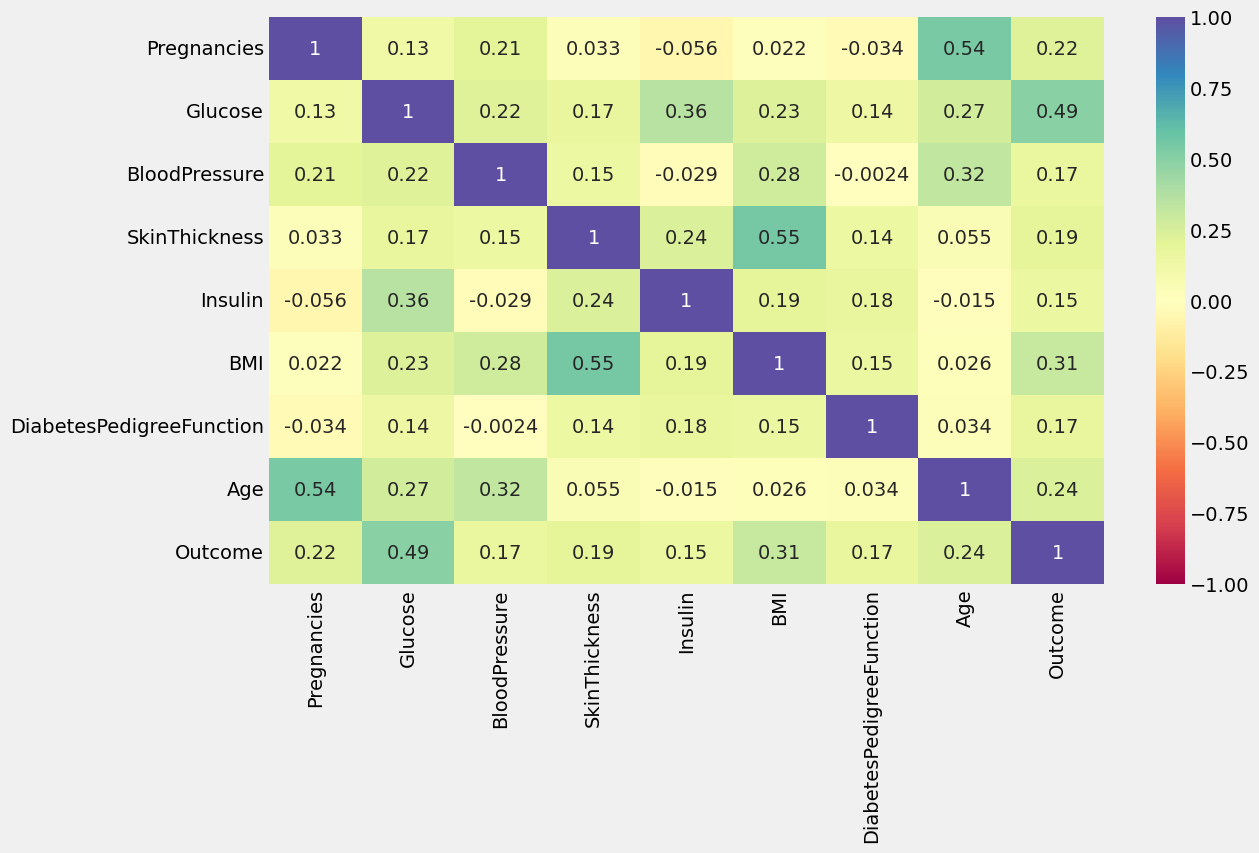

In [33]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(), annot=True, cmap='Spectral', vmin=-1, vmax=+1)

**Observations of Bivariate Analysis**
1. Women with higher Pregnancies, Glucose, DPF, Insulin are more likely to be diabetic
2. Glucose and Insulin, BMI and SkinThickness appear to have hiugh multicollinearity
3. Glucose, BMI appear to be strongest predictors of Diabetes

### App for EDA 

In [34]:
!pip install streamlit

In [35]:
%%writefile eda.py
import streamlit as st
st.title("The EDA Page")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
st.set_option('deprecation.showPyplotGlobalUse', False)
plt.style.use('fivethirtyeight')

### Step2. Load and View the data

data=pd.read_csv('data.csv')
st.subheader('Data View')
st.write(data.head())

st.subheader('Descriptives')
st.write(data.describe().T)

data.hist()
st.subheader('Histograms')
plt.tight_layout()
st.pyplot()

Overwriting eda.py


# End of Part 1

### Step 5 - Data preprocessing

1. Separate features and labels
2. Null value imputation 
3. Label encoding
4. Data imbalace handling
5. train test split
6. Feature scaling

In [36]:
def process(data,label):
    X=data.drop(label,axis=1)
    y=data[label]
    sm=SMOTE()
    X,y=sm.fit_resample(X,y)
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
    return x_train,x_test,y_train,y_test

In [37]:
x_train,x_test,y_train,y_test=process(df,'Outcome')

In [38]:
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

## Step 6 - Fit and evaluate models

In [39]:
def print_metrics(y_test,y_pred,model_name):
    print('The results of model',model_name)
    print('')
    print('Accuracy Score is',accuracy_score(y_test,y_pred))
    print('')
    print('Recall Score is',recall_score(y_test,y_pred))
    print('')
    print('Precision Score is',precision_score(y_test,y_pred))
    print('')
    print('F1-Score is',f1_score(y_test,y_pred))   

In [40]:
def plot_metrics(clf,x_test,y_test,model_name):
    plot_confusion_matrix(clf,x_test,y_test,display_labels=[0,1])
    print('')
    plot_roc_curve(clf,x_test,y_test)
    print('')
    plot_precision_recall_curve(clf,x_test,y_test)

In [41]:
## Fit the KNN method
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
print_metrics(y_pred,y_test,'KNN')

The results of model KNN

Accuracy Score is 0.74

Recall Score is 0.7094017094017094

Precision Score is 0.8217821782178217

F1-Score is 0.761467889908257


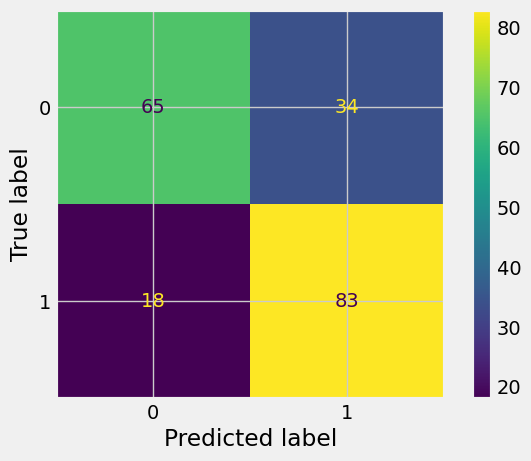

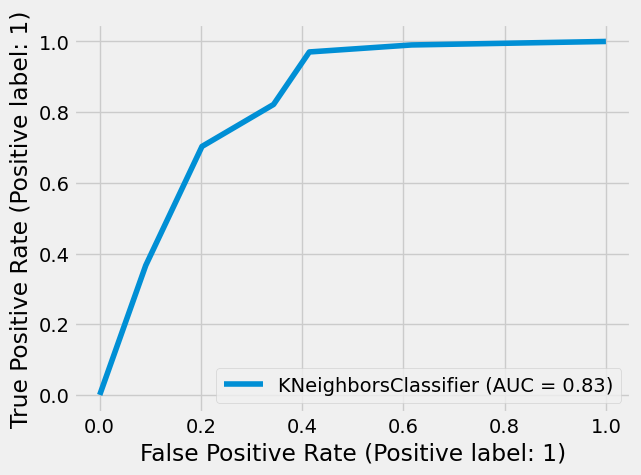

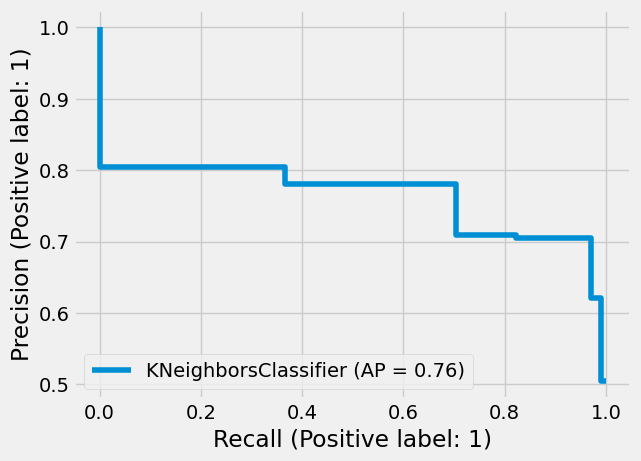

In [42]:
plot_metrics(knn,x_test,y_test,'KNN')

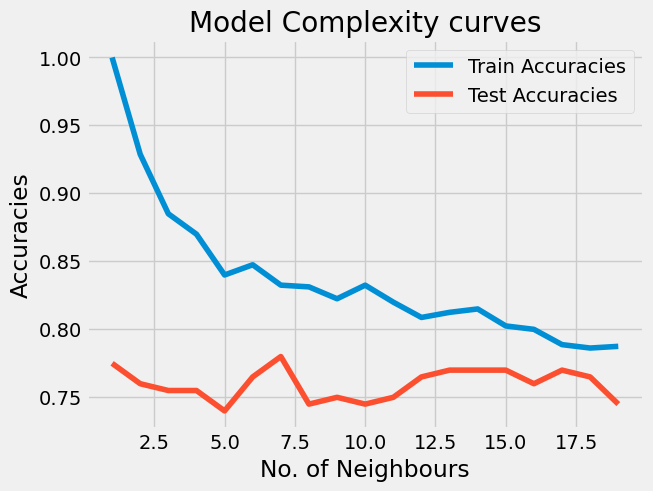

In [43]:
## Optimize K in KNN
neighbours=np.arange(1,20)
train_accuracies=np.empty(len(neighbours))
test_accuracies=np.empty(len(neighbours))

for i,k in enumerate(neighbours):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    train_accuracies[i]=knn.score(x_train,y_train)
    test_accuracies[i]=knn.score(x_test,y_test)
    
plt.plot(neighbours,train_accuracies,label='Train Accuracies')
plt.plot(neighbours,test_accuracies,label='Test Accuracies')
plt.legend()
plt.title("Model Complexity curves")
plt.xlabel('No. of Neighbours')
plt.ylabel('Accuracies')
plt.show()

In [44]:
## Refit KNN for K=16  ----- Look in the above plot where test and train accuracies are parallel 
knn=KNeighborsClassifier(n_neighbors=16)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
print_metrics(y_pred,y_test,'KNN')

The results of model KNN

Accuracy Score is 0.76

Recall Score is 0.712

Precision Score is 0.8811881188118812

F1-Score is 0.7876106194690266


In [45]:
# fit and evaluate all the modeland choose the best to deploy
clfs = {
    'LogisticRegression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'KNN':KNeighborsClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'RandomForestClassifier':RandomForestClassifier(),
    'AdaBoostClassifier':AdaBoostClassifier(),
    'GradientBoostingClassifier':GradientBoostingClassifier(),
    'XGBClassifier':XGBClassifier(),
    'SVM':SVC()
}

# create an empty dataframe of metrics
models_report = pd.DataFrame(columns=['Model_name','Accuracy','Recall','Precision',
                                    'f1_score'])

# fit and evaluate each model
for clf, clf_name in list(zip(clfs.values(), clfs.keys())):
    clf.fit(x_train, y_train)
    print('Fitting Classifier....', clf_name)
    y_pred=clf.predict(x_test)
    t=pd.Series({
        'Model_name':clf_name,
        'Accuracy':accuracy_score(y_test, y_pred),
        'Recall':recall_score(y_test, y_pred),
        'Precision':precision_score(y_test, y_pred),
        'f1_score':f1_score(y_test, y_pred)
    })
    models_report = models_report.append(t, ignore_index=True)
    
models_report=models_report.sort_values(by='f1_score', ascending=False)
models_report

Fitting Classifier.... LogisticRegression
Fitting Classifier.... Naive Bayes
Fitting Classifier.... KNN
Fitting Classifier.... DecisionTreeClassifier
Fitting Classifier.... RandomForestClassifier
Fitting Classifier.... AdaBoostClassifier
Fitting Classifier.... GradientBoostingClassifier
Fitting Classifier.... XGBClassifier
Fitting Classifier.... SVM


,Model_name,Accuracy,Recall,Precision,f1_score
4,RandomForestClassifier,0.815,0.871287,0.785714,0.826291
8,SVM,0.800,0.881188,0.760684,0.816514
7,XGBClassifier,0.780,0.851485,0.747826,0.796296
5,AdaBoostClassifier,0.765,0.801980,0.750000,0.775120
6,GradientBoostingClassifier,0.760,0.811881,0.738739,0.773585
2,KNN,0.740,0.821782,0.709402,0.761468
0,LogisticRegression,0.750,0.772277,0.742857,0.757282
3,DecisionTreeClassifier,0.745,0.772277,0.735849,0.753623
1,Naive Bayes,0.755,0.702970,0.788889,0.743455


In [46]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [48]:
# optimize the model using GridSearchCV
param_grid={
    'n_estimators':[100,150,200,250,300],
    'min_samples_leaf':range(1,5,1),
    'min_samples_split':range(2,10,2),
    'max_depth':[1,2,3,4,5],
    'criterion':['entropy','gini']
}
n_folds=3
cv=GridSearchCV(estimator=rfc, param_grid=param_grid,cv=n_folds,
               n_jobs=-1, verbose=5,return_train_score=False)
cv.fit(x_train, y_train)
cv.best_score_

Fitting 3 folds for each of 800 candidates, totalling 2400 fits


0.8099790675189847

In [49]:
# lets interpret the model
rfc_tuned = cv.best_estimator_
rfc_tuned

RandomForestClassifier(criterion='entropy', max_depth=5, min_samples_leaf=3,
                       min_samples_split=8, n_estimators=200)

In [ ]:
!pip install shap

In [ ]:
X= data.drop("Outcome",axis=1)

In [ ]:
# Feature importance/model interpretation
import shap
value=shap.TreeExplainer(rfc).shap_values(x_test)
shap.summary_plot(value,x_train,plot_type='bar',
                 feature_names=X.columns)

In [ ]:
# Create the deployment model pipeline
from sklearn.pipeline import Pipeline
sc=StandardScaler()
rfc=rfc
steps=[("sc",sc),("rfc",rfc)]
pipeline=Pipeline(steps)
x_train,x_test,y_train,y_test=process(df,"Outcome")
pipeline.fit(x_train,y_train)
y_pred=pipeline.predict(x_test)
print_metrics(y_test,y_pred,'Pipeline RFC')

In [ ]:
# Lets us freeze the model by pickling it
import pickle
model=open('rfc.pickle','wb')      # wb: write in binary format
pickle.dump(pipeline,model)
model.close()

### Deploy the picked model

In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
import pickle
from sklearn.preprocessing import StandardScaler


#Step 1 : Load the train model
model=open('rfc.pickle','rb')                   #rb: read in binary format
clf=pickle.load(model)
model.close()

# Step 2: Get the user input from front end
pregs=st.number_input('Pregnancies', 0,step=1)
glucose=st.slider('Glucose',40,200,40)
bp=st.slider('BloodPressure',20,140,20)
skin=st.slider('SkinThickness',7,99,7)
insulin=st.slider('Insulin',14,850,14)
bmi=st.slider('BMI',18,70,18)
dpf=st.slider('DiabetesPedigreeFunction',0.05,2.50,0.05)
age=st.slider('Age',21,90,21)

# Step 3 : Convert user inout to model input
data={
    'Pregnancies':pregs,
    'Glucose':glucose,
    'BloodPressure':bp,
    'SkinThickness':skin,
    'Insulin':insulin,
    'BMI':bmi,
    'DiabetesPedigreeFunction':dpf, 
    'Age':age
}
input_data = pd.DataFrame([data])

# step4 : get the predictions and print the result
prediction = clf.predict(input_data)[0]
if st.button("Predict"):
    if prediction==0:
        st.write("The Person is Healthy")
    if prediction==1:
        st.write("The Person has Diabetes")
